<a href="https://colab.research.google.com/github/Farhan269/Drought-prediction/blob/main/Drought/Final_SPEI6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving Ishwardi.csv to Ishwardi.csv


{'Ishwardi.csv': b'year,Month Order,Month,prcp(mm),Tmax(\xcb\x9aC),Tmin(\xcb\x9aC),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12\r\n1981,1,jan,30,23.57419359,11.69999996,222.8000004,70.4516129,2.313320516,87.01389,1.813573733,NaN,NaN,NaN\r\n1981,2,feb,81,26.44642857,13.55714287,228.6999981,68.08928571,1.513923429,102.43569,1.894641623,NaN,NaN,NaN\r\n1981,3,mar,64,30.21290312,17.38064517,252.8999996,64.53225806,2.331574839,144.99705,1.197579752,1.9027411,NaN,NaN\r\n1981,4,apr,360,31.4,21.2,254.3999996,71.5,3.0369108,149.17473,2.43119657,2.238628532,NaN,NaN\r\n1981,5,may,323,32.41935484,23.72258069,240.5000007,76.20967742,3.775325806,156.34953,1.785859165,2.256429267,NaN,NaN\r\n1981,6,jun,223,32.48333333,26.03666668,140.5000001,80.13333333,3.4433184,135.68414,0.02637155,2.288249656,2.406761962,NaN\r\n1981,7,jul,478,31.18709675,25.82580646,130.7999998,83.70967742,3.250928903,124.59253,1.455305069,1.904349682,2.486588541,NaN\r\n1981,8,aug,211,31.97419351,26.51612903

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df= pd.read_csv('Ishwardi.csv')

In [ ]:
df

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,NaN
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,NaN
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,NaN
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,NaN
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


In [ ]:
df.isnull().sum()


year                 0
Month Order          0
Month                0
prcp(mm)             0
Tmax(˚C)             0
Tmin(˚C)             0
SSH(hrs)             0
Humidity avg %       0
wind speed (m/s)     0
PET                  0
spei1                0
spei3                2
spei6                5
spei12              11
dtype: int64

Separate null value

In [ ]:
test_data=df[df["spei12"].isnull()]

In [ ]:
test_data

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,NaN
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,NaN
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,NaN
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,NaN
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,NaN
5,1981,6,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414,0.026372,2.288250,2.406762,NaN
6,1981,7,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253,1.455305,1.904350,2.486589,NaN
7,1981,8,aug,211,31.974194,26.516129,176.000000,81.096774,3.728860,122.56709,0.119539,0.984630,2.243884,NaN
8,1981,9,sep,423,31.763333,25.816667,165.599999,82.483333,3.009474,111.64418,1.231757,1.359016,2.185121,NaN
9,1981,10,oct,0,32.206451,22.409677,249.900000,70.564516,1.083643,123.79691,-1.931238,0.161909,1.418281,NaN


In [ ]:
dat = df.dropna()

In [ ]:
dat

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
11,1981,12,dec,48,24.787097,12.022581,231.000001,67.467742,1.782286,87.52109,1.819494,-1.256290,0.935759,2.179214
12,1982,1,jan,0,25.400000,10.983871,240.100000,65.677419,1.007307,97.37734,-1.346388,0.649493,0.290084,2.100614
13,1982,2,feb,8,26.707143,12.321429,228.500001,61.750000,2.048574,106.82316,-0.059377,0.924485,0.522470,2.065718
14,1982,3,mar,81,30.032258,16.990323,246.600000,62.903226,2.670110,145.17363,1.451458,0.889373,-0.331903,2.132655
15,1982,4,apr,133,34.830000,22.763333,249.800001,67.000000,3.606224,171.43721,1.046341,1.227840,1.444260,1.760776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


In [ ]:
dat.isnull().sum()

year                0
Month Order         0
Month               0
prcp(mm)            0
Tmax(˚C)            0
Tmin(˚C)            0
SSH(hrs)            0
Humidity avg %      0
wind speed (m/s)    0
PET                 0
spei1               0
spei3               0
spei6               0
spei12              0
dtype: int64

In [ ]:
dat.shape

(433, 14)

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
dat['Month']=ord_mon.fit_transform(dat[['Month']])

<ipython-input-13-a36d62a53582>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Month']=ord_mon.fit_transform(dat[['Month']])


In [ ]:
x=dat[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
y=dat['spei12']
lr=LinearRegression()
lr.fit(x,y)


LinearRegression()

In [ ]:
x_test = test_data[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
x_test

,year,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET
0,1981,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389
1,1981,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569
2,1981,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705
3,1981,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473
4,1981,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953
5,1981,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414
6,1981,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253
7,1981,aug,211,31.974194,26.516129,176.000000,81.096774,3.728860,122.56709
8,1981,sep,423,31.763333,25.816667,165.599999,82.483333,3.009474,111.64418
9,1981,oct,0,32.206451,22.409677,249.900000,70.564516,1.083643,123.79691


In [ ]:
x_test.shape

(11, 9)

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
x_test['Month']=ord_mon.fit_transform(x_test[['Month']])

<ipython-input-17-e3206a7399ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Month']=ord_mon.fit_transform(x_test[['Month']])


In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred

array([0.77463287, 1.08351318, 0.72237126, 1.14156441, 0.6087868 ,
       0.18573105, 0.91423905, 0.16141234, 0.87002394, 0.80933688,
       0.5473786 ])

In [ ]:
test_data.loc[test_data.spei12.isnull(),'spei12'] = y_pred

<ipython-input-20-6bcee27984da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[test_data.spei12.isnull(),'spei12'] = y_pred


In [ ]:
test_data

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,0.608787
5,1981,6,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414,0.026372,2.288250,2.406762,0.185731
6,1981,7,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253,1.455305,1.904350,2.486589,0.914239
7,1981,8,aug,211,31.974194,26.516129,176.000000,81.096774,3.728860,122.56709,0.119539,0.984630,2.243884,0.161412
8,1981,9,sep,423,31.763333,25.816667,165.599999,82.483333,3.009474,111.64418,1.231757,1.359016,2.185121,0.870024
9,1981,10,oct,0,32.206451,22.409677,249.900000,70.564516,1.083643,123.79691,-1.931238,0.161909,1.418281,0.809337


In [ ]:
df.loc[df.spei12.isnull(),'spei12'] = y_pred

In [ ]:
df

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,0.608787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


For spei6

In [ ]:
test_data=df[df["spei6"].isnull()]

In [ ]:
test_data

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,0.608787


In [ ]:
dat = df.dropna()
dat

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
5,1981,6,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414,0.026372,2.288250,2.406762,0.185731
6,1981,7,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253,1.455305,1.904350,2.486589,0.914239
7,1981,8,aug,211,31.974194,26.516129,176.000000,81.096774,3.728860,122.56709,0.119539,0.984630,2.243884,0.161412
8,1981,9,sep,423,31.763333,25.816667,165.599999,82.483333,3.009474,111.64418,1.231757,1.359016,2.185121,0.870024
9,1981,10,oct,0,32.206451,22.409677,249.900000,70.564516,1.083643,123.79691,-1.931238,0.161909,1.418281,0.809337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


In [ ]:
dat.isnull().sum()

year                0
Month Order         0
Month               0
prcp(mm)            0
Tmax(˚C)            0
Tmin(˚C)            0
SSH(hrs)            0
Humidity avg %      0
wind speed (m/s)    0
PET                 0
spei1               0
spei3               0
spei6               0
spei12              0
dtype: int64

In [ ]:
dat.shape

(439, 14)

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
dat['Month']=ord_mon.fit_transform(dat[['Month']])

<ipython-input-29-a36d62a53582>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Month']=ord_mon.fit_transform(dat[['Month']])


In [ ]:
x=dat[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
y=dat['spei6']
lr=LinearRegression()
lr.fit(x,y)


LinearRegression()

In [ ]:
x_test = test_data[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
x_test

,year,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET
0,1981,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389
1,1981,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569
2,1981,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705
3,1981,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473
4,1981,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953


In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
x_test['Month']=ord_mon.fit_transform(x_test[['Month']])

<ipython-input-32-e3206a7399ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Month']=ord_mon.fit_transform(x_test[['Month']])


In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([0.73433602, 0.87501459, 0.52255415, 1.34227872, 0.8434945 ])

In [ ]:
df.loc[df.spei6.isnull(),'spei6'] = y_pred
df

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,0.734336,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,0.875015,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,0.522554,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,1.342279,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,0.843495,0.608787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


For spei3

In [ ]:
test_data=df[df["spei3"].isnull()]
test_data

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,0.734336,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,0.875015,1.083513


In [ ]:
dat = df.dropna()
dat

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,0.522554,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,1.342279,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,0.843495,0.608787
5,1981,6,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414,0.026372,2.288250,2.406762,0.185731
6,1981,7,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253,1.455305,1.904350,2.486589,0.914239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


In [ ]:
dat.isnull().sum()

year                0
Month Order         0
Month               0
prcp(mm)            0
Tmax(˚C)            0
Tmin(˚C)            0
SSH(hrs)            0
Humidity avg %      0
wind speed (m/s)    0
PET                 0
spei1               0
spei3               0
spei6               0
spei12              0
dtype: int64

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
dat['Month']=ord_mon.fit_transform(dat[['Month']])

<ipython-input-38-a36d62a53582>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Month']=ord_mon.fit_transform(dat[['Month']])


In [ ]:
x=dat[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
y=dat['spei3']
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [ ]:
x_test = test_data[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
x_test


,year,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET
0,1981,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389
1,1981,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569


In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
x_test['Month']=ord_mon.fit_transform(x_test[['Month']])

<ipython-input-41-e3206a7399ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Month']=ord_mon.fit_transform(x_test[['Month']])


In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([0.90774864, 0.72796066])

In [ ]:
df.loc[df.spei3.isnull(),'spei3'] = y_pred
df

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,0.907749,0.734336,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,0.727961,0.875015,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,0.522554,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,1.342279,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,0.843495,0.608787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


<ipython-input-44-2027c78a47a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


<Axes: >

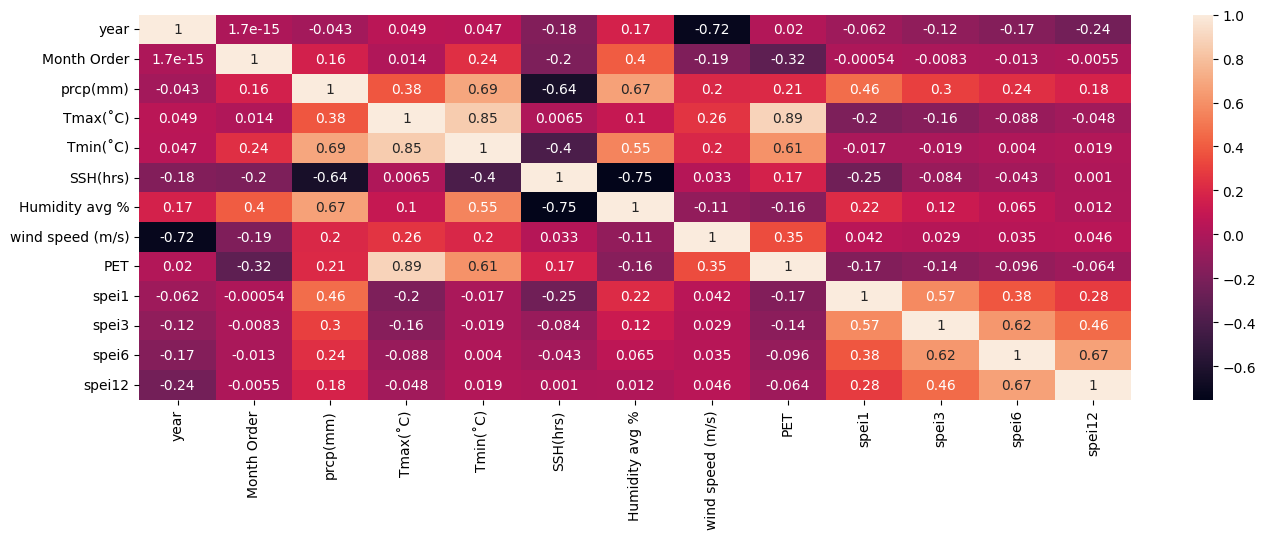

In [ ]:
corr_matrix=df.corr()
plt.figure(1, figsize=(16,5))
sns.heatmap(corr_matrix, annot=True)

**For SPEI-6**

In [ ]:
df_6 = df.drop([ 'spei1','spei3', 'spei12'],axis=1,)

In [ ]:
df_6

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei6
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,0.734336
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,0.875015
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,0.522554
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,1.342279
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,0.843495
...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.488297
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.379295
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,0.969036
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,1.259411


In [ ]:
df_6.loc[df_6["spei6"]>-0.5, 'drought_category'] = 'No-drought'
df_6.loc[(df_6["spei6"]<=-0.5) & (df_6["spei6"]>=-0.99 ), 'drought_category'] = 'Mild'
df_6.loc[(df_6["spei6"]<=-1) & (df_6["spei6"]>=-1.49 ), 'drought_category'] = 'Moderate'
df_6.loc[(df_6["spei6"]<=-1.50) & (df_6["spei6"]>=-1.99 ), 'drought_category'] = 'Severe'
df_6.loc[df_6["spei6"]<-2, 'drought_category'] = 'Extreme'
df_6

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei6,drought_category
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,0.734336,No-drought
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,0.875015,No-drought
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,0.522554,No-drought
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,1.342279,No-drought
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,0.843495,No-drought
...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.488297,No-drought
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.379295,No-drought
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,0.969036,No-drought
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,1.259411,No-drought


In [ ]:
df_6["drought_category"].value_counts()

No-drought    290
Mild           77
Moderate       43
Severe         26
Extreme         2
Name: drought_category, dtype: int64

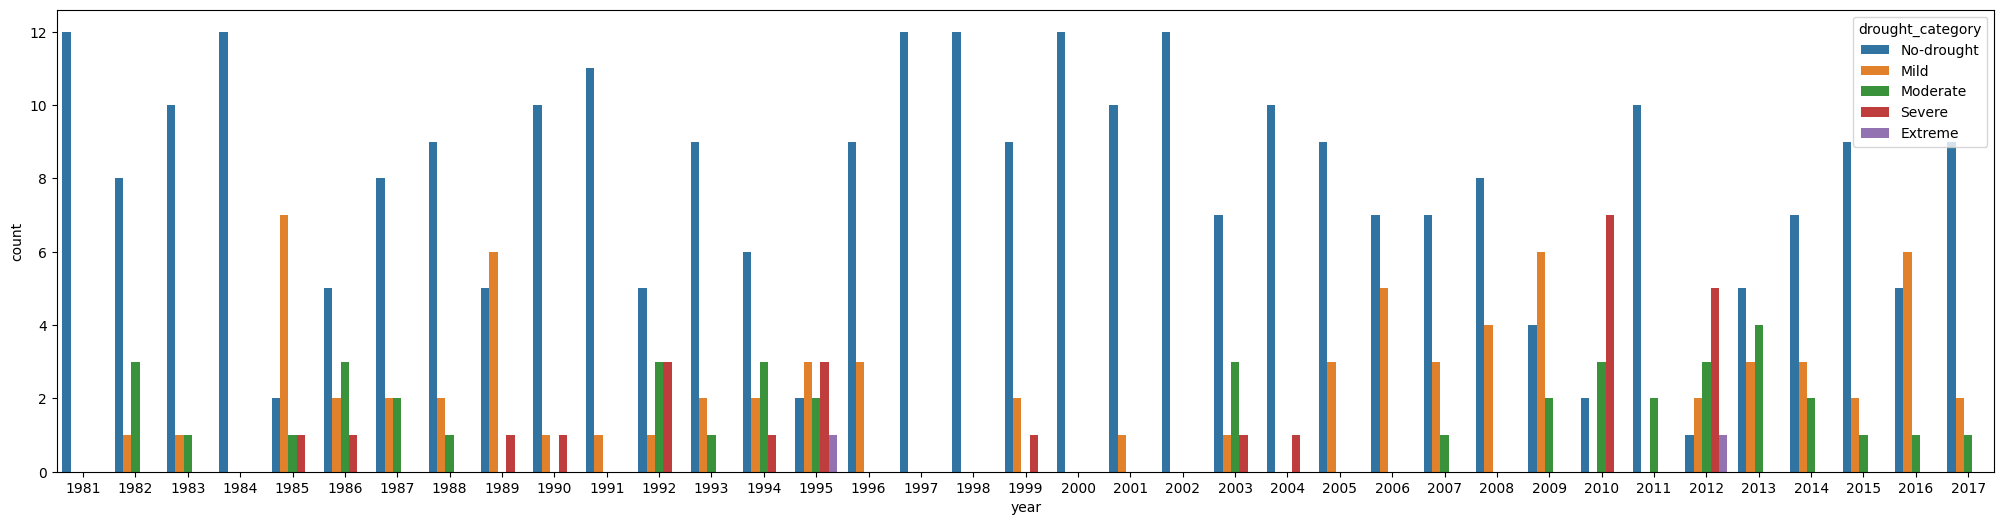

In [ ]:
plt.figure(figsize=(25, 6))  # Set the figure size as desired (width, height)
sns.countplot(data=df_6, x = 'year', hue='drought_category' )
plt.show()

<ipython-input-50-80eeeae29907>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df_3.corr()


<Axes: >

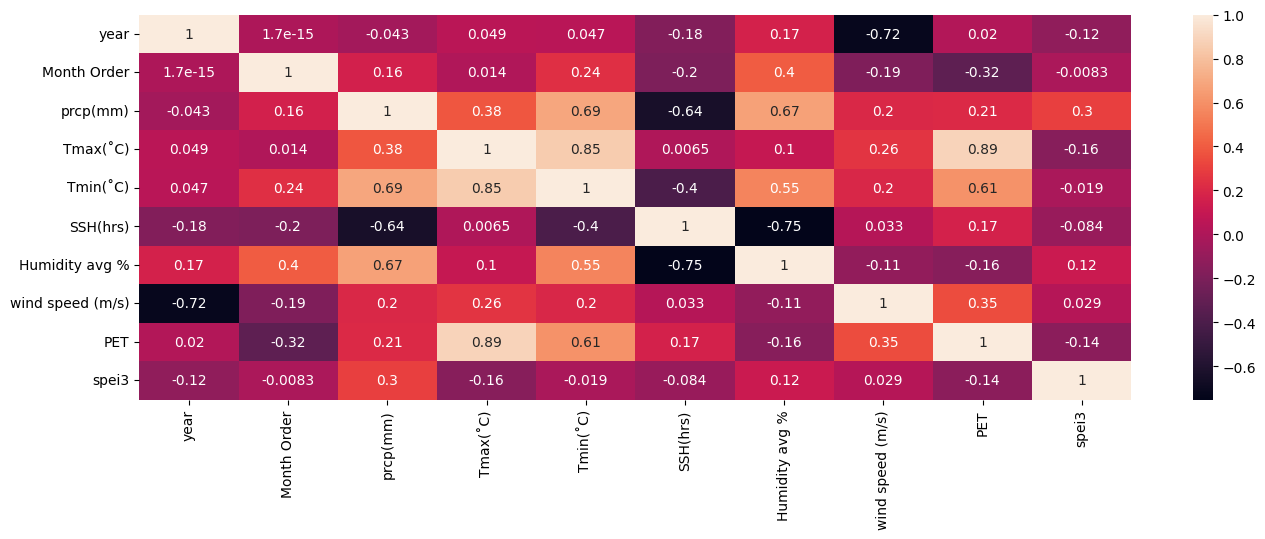

In [ ]:
corr_matrix=df_6.corr()
plt.figure(1, figsize=(16,5))
sns.heatmap(corr_matrix, annot=True)

For prediction SVM

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
df['Month']=ord_mon.fit_transform(df[['Month']])

In [ ]:
x=df[['prcp(mm)', 'Tmax(˚C)', 'Tmin(˚C)','SSH(hrs)','Humidity avg %','wind speed (m/s)', 'PET']]
y=df['spei6']
Scaler=StandardScaler()
Scaled_x=Scaler.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=2)

In [ ]:
xtrain

,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s)
329,206,32.886667,25.800000,132.900000,82.666667,1.505594
381,157,31.848387,21.703226,246.400000,77.387097,0.761703
371,0,24.190323,12.303226,131.500000,76.145161,1.098578
364,155,34.116129,24.064516,216.700000,77.225806,1.209764
428,381,33.183333,26.230000,160.800000,86.633333,0.900270
...,...,...,...,...,...,...
299,1,26.490322,12.948387,250.299998,68.370968,1.247932
22,67,28.616667,16.443333,216.600000,69.233333,2.208662
72,2,25.329032,10.141935,254.300002,71.903226,2.062738
15,133,34.830000,22.763333,249.800001,67.000000,3.606224


In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVR(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([8.07895660e-03, 3.50194292e+00, 7.01222420e-03, 2.29698979e+01,
        6.62899017e-03, 4.15665303e+01]),
 'std_fit_time': array([2.30550127e-03, 1.05366774e+00, 7.07913328e-04, 3.45217802e+00,
        2.96881128e-04, 8.33826490e+00]),
 'mean_score_time': array([0.00284362, 0.00272436, 0.00272083, 0.00240302, 0.00272808,
        0.00256376]),
 'std_score_time': array([4.14697274e-04, 3.58163985e-04, 1.15487558e-04, 5.88307687e-05,
        6.57658479e-04, 1.86593295e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'li

In [ ]:
df_svm = pd.DataFrame(clf.cv_results_)
df_svm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008079,0.002306,0.002844,0.000415,1,rbf,"{'C': 1, 'kernel': 'rbf'}",-0.036628,0.009778,-0.000052,-0.034638,0.020235,-0.008261,0.023260,6
1,3.501943,1.053668,0.002724,0.000358,1,linear,"{'C': 1, 'kernel': 'linear'}",-0.232277,0.099117,0.227327,0.212727,0.027832,0.066945,0.166777,1
2,0.007012,0.000708,0.002721,0.000115,10,rbf,"{'C': 10, 'kernel': 'rbf'}",-0.028751,0.013846,0.000453,-0.028980,0.019752,-0.004736,0.020671,4
3,22.969898,3.452178,0.002403,0.000059,10,linear,"{'C': 10, 'kernel': 'linear'}",-0.297077,0.095305,0.260854,0.229459,0.026799,0.063068,0.199431,2
4,0.006629,0.000297,0.002728,0.000658,20,rbf,"{'C': 20, 'kernel': 'rbf'}",-0.028751,0.013846,0.000453,-0.028980,0.019752,-0.004736,0.020671,4
5,41.566530,8.338265,0.002564,0.000187,20,linear,"{'C': 20, 'kernel': 'linear'}",-0.438320,0.086819,0.224149,0.194402,-0.003789,0.012652,0.239546,3


In [ ]:
df_svm[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,-0.008261
1,1,linear,0.066945
2,10,rbf,-0.004736
3,10,linear,0.063068
4,20,rbf,-0.004736
5,20,linear,0.012652


In [ ]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
clf.best_score_

0.06694518172883948

In [ ]:
model_svr = SVR(kernel='linear',C=1,gamma='auto')

In [ ]:
model_svr.fit(xtrain,ytrain)

SVR(C=1, gamma='auto', kernel='linear')

In [ ]:
model_svr.score(xtest,ytest)

0.1417129352398826

In [ ]:
pred_svm = model_svr.predict(xtest)

In [ ]:
mae = mean_absolute_error(ytest,pred_svm)
mse = mean_squared_error(ytest,pred_svm)
rmse = mean_squared_error(ytest,pred_svm, squared = False)
r2 = r2_score(ytest,pred_svm)


def calculate_nse(observed, predicted):
    obs_mean = np.mean(observed)
    ss_diff_obs_pred = np.sum((observed - predicted) ** 2)
    ss_diff_obs_mean = np.sum((observed - obs_mean) ** 2)
    nse = 1 - (ss_diff_obs_pred / ss_diff_obs_mean)
    return nse
nse= calculate_nse(ytest, pred_svm)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)

NSE coefficient: 0.1417129352398826
Mean Absolute Error: 0.7607357297254985
Mean Squared Error: 0.8131542813607644
r2 score: 0.1417129352398826
RMSE: 0.9017506758305005


In [ ]:
com = pd.concat([ytest, pd.Series(pred_svm,index=xtest.index)],axis=1)

In [ ]:
com

,spei6,0
397,-0.967445,-0.214477
203,1.530346,0.110975
119,1.211499,-0.104788
331,-0.536570,0.026227
175,-0.998959,0.112032
...,...,...
306,-0.548517,0.221900
215,0.549538,0.104929
89,1.076869,0.234344
198,0.928958,1.075853


In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Predicted"]
com

,Actual,Predicted
0,-0.967445,-0.214477
1,1.530346,0.110975
2,1.211499,-0.104788
3,-0.536570,0.026227
4,-0.998959,0.112032
...,...,...
84,-0.548517,0.221900
85,0.549538,0.104929
86,1.076869,0.234344
87,0.928958,1.075853


<Axes: >

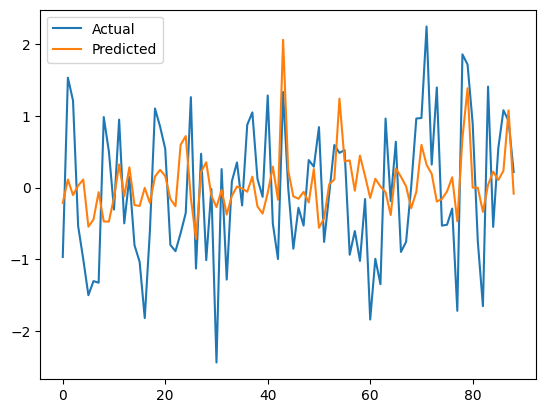

In [ ]:
com.plot()

RandomForest

In [ ]:
clf = GridSearchCV(RandomForestRegressor(), {
    'n_estimators': [100, 300, 500, 1000, 2000 , 4000],
    'max_depth': [1, 2, 5, 10,15, 20, 25],

}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([0.09284434, 0.26846342, 0.56115503, 0.89981637, 1.86274157,
        3.60024786, 0.09860826, 0.39127994, 0.50269494, 0.96125813,
        2.03277116, 4.07094197, 0.12314644, 0.35636907, 0.59149065,
        1.29084125, 2.48209629, 5.05617795, 0.14513216, 0.43234448,
        0.82624221, 1.43182197, 3.09744329, 5.95255408, 0.15517468,
        0.56206212, 0.76173058, 1.63010826, 3.13597803, 6.39620252,
        0.15504518, 0.45815034, 0.76699672, 1.63832355, 3.14382625,
        6.43704014, 0.15499325, 0.48869548, 0.83973203, 1.57032509,
        3.34907322, 6.49225183]),
 'std_fit_time': array([0.0055211 , 0.00882168, 0.09399093, 0.05553824, 0.23739079,
        0.25572786, 0.00220952, 0.05441947, 0.03970045, 0.00908456,
        0.22832322, 0.27412579, 0.00127935, 0.0074768 , 0.00619651,
        0.15000346, 0.13906682, 0.27491907, 0.00247777, 0.01042887,
        0.12122005, 0.00861022, 0.27362323, 0.27477846, 0.0021336 ,
        0.09308293, 0.01460082, 0.19539187, 0.231

In [ ]:
df_rf = pd.DataFrame(clf.cv_results_)
df_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.092844,0.005521,0.003954,0.000095,1,100,"{'max_depth': 1, 'n_estimators': 100}",-0.109513,0.056104,0.070637,0.031935,0.047482,0.019329,0.065630,23
1,0.268463,0.008822,0.008002,0.000131,1,300,"{'max_depth': 1, 'n_estimators': 300}",-0.111420,0.056420,0.068939,0.036071,0.045179,0.019038,0.066152,26
2,0.561155,0.093991,0.015461,0.004238,1,500,"{'max_depth': 1, 'n_estimators': 500}",-0.122793,0.060175,0.075095,0.035102,0.043988,0.018313,0.071873,29
3,0.899816,0.055538,0.025453,0.003796,1,1000,"{'max_depth': 1, 'n_estimators': 1000}",-0.115939,0.057485,0.075830,0.036874,0.046269,0.020104,0.069248,19
4,1.862742,0.237391,0.057036,0.018484,1,2000,"{'max_depth': 1, 'n_estimators': 2000}",-0.117407,0.058858,0.074106,0.034888,0.045420,0.019173,0.069545,24
5,3.600248,0.255728,0.085435,0.006464,1,4000,"{'max_depth': 1, 'n_estimators': 4000}",-0.117687,0.058632,0.073912,0.034601,0.045793,0.019050,0.069614,25
6,0.098608,0.002210,0.004150,0.000039,2,100,"{'max_depth': 2, 'n_estimators': 100}",-0.093719,0.055384,0.081237,0.100905,0.088538,0.046469,0.071658,12
7,0.391280,0.054419,0.010806,0.001628,2,300,"{'max_depth': 2, 'n_estimators': 300}",-0.091743,0.073267,0.078589,0.096289,0.089917,0.049264,0.070969,9
8,0.502695,0.039700,0.014564,0.003081,2,500,"{'max_depth': 2, 'n_estimators': 500}",-0.102933,0.072630,0.085165,0.093626,0.089742,0.047646,0.075620,11
9,0.961258,0.009085,0.025247,0.004417,2,1000,"{'max_depth': 2, 'n_estimators': 1000}",-0.096839,0.071217,0.090748,0.096748,0.091413,0.050657,0.074257,8


In [ ]:
df_rf[['param_max_depth','param_n_estimators','mean_test_score']]

,param_max_depth,param_n_estimators,mean_test_score
0,1,100,0.019329
1,1,300,0.019038
2,1,500,0.018313
3,1,1000,0.020104
4,1,2000,0.019173
5,1,4000,0.019050
6,2,100,0.046469
7,2,300,0.049264
8,2,500,0.047646
9,2,1000,0.050657


In [ ]:
clf.best_params_

{'max_depth': 5, 'n_estimators': 2000}

In [ ]:
clf.best_score_

0.0659505556426689

In [ ]:
rf = RandomForestRegressor(
    max_depth = 5,
    n_estimators=2000,

)

In [ ]:
rf.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=5, n_estimators=2000)

In [ ]:
rf.score(xtest,ytest)

0.08150735752575144

In [ ]:
pred_rf = rf.predict(xtest)

In [ ]:
mae = mean_absolute_error(ytest,pred_rf)
mse = mean_squared_error(ytest,pred_rf)
rmse = mean_squared_error(ytest,pred_rf, squared = False)
r2 = r2_score(ytest,pred_rf)


nse= calculate_nse(ytest, pred_rf)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)


NSE coefficient: 0.08150735752575144
Mean Absolute Error: 0.7725068353166813
Mean Squared Error: 0.8701939657392382
r2 score: 0.08150735752575144
RMSE: 0.9328418760643404


In [ ]:
com = pd.concat([ytest, pd.Series(pred_rf,index=xtest.index)],axis=1)

NameError: ignored

In [ ]:
com

In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Predicted"]
com

In [ ]:
com.plot()

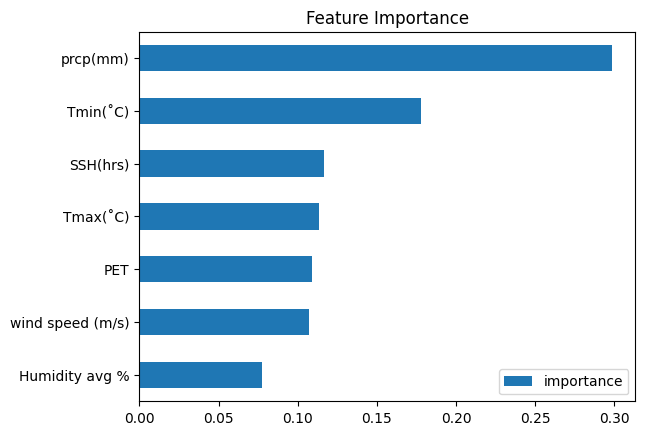

In [ ]:
fi = pd.DataFrame(data=rf.feature_importances_,
             index=rf.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

KNN

In [ ]:
clf = GridSearchCV(KNeighborsRegressor(), {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform','distance'],
    'leaf_size': [25,30,35,40]
}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([0.00206532, 0.00150046, 0.00201955, 0.00184197, 0.00142756,
        0.00192642, 0.0016109 , 0.00143909, 0.00139313, 0.00145426,
        0.0014555 , 0.00169096, 0.00149546, 0.00147252, 0.00156918,
        0.00144515, 0.00143962, 0.00145965, 0.00148792, 0.00147419,
        0.00141935, 0.00150728, 0.00146365, 0.00144768, 0.0019341 ,
        0.0014564 , 0.00166926, 0.00149155, 0.00142655, 0.00153828,
        0.00202632, 0.00155435]),
 'std_fit_time': array([9.79427268e-04, 9.24129112e-05, 9.59584455e-04, 5.10708923e-04,
        2.09919943e-05, 3.95073816e-04, 1.87185437e-04, 3.03449816e-05,
        1.55841881e-05, 3.97130071e-05, 2.66062316e-05, 3.22665406e-04,
        9.10095403e-05, 5.91809280e-05, 1.50798845e-04, 2.43166380e-05,
        4.15008339e-05, 4.91321401e-05, 6.23197891e-05, 3.44622984e-05,
        2.08702206e-05, 5.99278271e-05, 7.14557625e-05, 3.04885070e-05,
        2.79940102e-04, 2.76621451e-05, 4.41432076e-04, 6.23425151e-05,
        2.46061835e-0

In [ ]:
df_knn = pd.DataFrame(clf.cv_results_)
df_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002065,0.000979,0.001608,0.000242,25,3,uniform,"{'leaf_size': 25, 'n_neighbors': 3, 'weights':...",-0.452416,-0.161001,-0.073246,-0.118483,-0.193688,-0.199767,0.132654,25
1,0.001500,0.000092,0.001452,0.000043,25,3,distance,"{'leaf_size': 25, 'n_neighbors': 3, 'weights':...",-0.547043,-0.192166,-0.080130,-0.117978,-0.183537,-0.224171,0.166701,29
2,0.002020,0.000960,0.001453,0.000072,25,5,uniform,"{'leaf_size': 25, 'n_neighbors': 5, 'weights':...",-0.513801,0.032489,0.101349,-0.006693,-0.227671,-0.122866,0.224374,17
3,0.001842,0.000511,0.001783,0.000527,25,5,distance,"{'leaf_size': 25, 'n_neighbors': 5, 'weights':...",-0.528798,0.008359,0.073626,-0.016689,-0.172567,-0.127214,0.216453,21
4,0.001428,0.000021,0.001670,0.000519,25,7,uniform,"{'leaf_size': 25, 'n_neighbors': 7, 'weights':...",-0.311000,0.073880,0.164648,0.141681,-0.106229,-0.007404,0.179093,9
5,0.001926,0.000395,0.002172,0.000785,25,7,distance,"{'leaf_size': 25, 'n_neighbors': 7, 'weights':...",-0.336558,0.076922,0.135034,0.109488,-0.088518,-0.020726,0.176124,13
6,0.001611,0.000187,0.001584,0.000151,25,9,uniform,"{'leaf_size': 25, 'n_neighbors': 9, 'weights':...",-0.297930,0.034129,0.166336,0.161027,-0.044894,0.003734,0.170570,1
7,0.001439,0.000030,0.001439,0.000030,25,9,distance,"{'leaf_size': 25, 'n_neighbors': 9, 'weights':...",-0.310386,0.067820,0.149785,0.137420,-0.038020,0.001324,0.169526,5
8,0.001393,0.000016,0.001360,0.000019,30,3,uniform,"{'leaf_size': 30, 'n_neighbors': 3, 'weights':...",-0.452416,-0.161001,-0.073246,-0.118483,-0.193688,-0.199767,0.132654,25
9,0.001454,0.000040,0.001476,0.000061,30,3,distance,"{'leaf_size': 30, 'n_neighbors': 3, 'weights':...",-0.547043,-0.192166,-0.080130,-0.117978,-0.183537,-0.224171,0.166701,29


In [ ]:
df_knn[['param_leaf_size','param_n_neighbors','param_weights', 'mean_test_score']]

,param_leaf_size,param_n_neighbors,param_weights,mean_test_score
0,25,3,uniform,-0.199767
1,25,3,distance,-0.224171
2,25,5,uniform,-0.122866
3,25,5,distance,-0.127214
4,25,7,uniform,-0.007404
5,25,7,distance,-0.020726
6,25,9,uniform,0.003734
7,25,9,distance,0.001324
8,30,3,uniform,-0.199767
9,30,3,distance,-0.224171


In [ ]:
clf.best_params_

{'leaf_size': 25, 'n_neighbors': 9, 'weights': 'uniform'}

In [ ]:
clf.best_score_

0.0037335433637000425

In [ ]:
knn=KNeighborsRegressor(n_neighbors=9, weights='uniform', algorithm='auto', leaf_size=25)

In [ ]:
knn.fit(xtrain, ytrain)


KNeighborsRegressor(leaf_size=25, n_neighbors=9)

In [ ]:
knn.score(xtest,ytest)

-0.11148121011947931

In [ ]:
pred_knn = knn.predict(xtest)

In [ ]:
mae = mean_absolute_error(ytest,pred_knn)
mse = mean_squared_error(ytest,pred_knn)
rmse = mean_squared_error(ytest,pred_knn, squared = False)
r2 = r2_score(ytest,pred_knn)

nse = calculate_nse(ytest, pred_knn)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)

NSE coefficient: -0.11148121011947931
Mean Absolute Error: 0.882441542676372
Mean Squared Error: 1.0530342839470646
r2 score: -0.11148121011947931
RMSE: 1.0261745874592025


In [ ]:
com = pd.concat([ytest, pd.Series(pred_knn,index=xtest.index)],axis=1)
com

,spei6,0
397,-0.967445,0.250458
203,1.530346,0.018047
119,1.211499,-0.596416
331,-0.536570,0.376081
175,-0.998959,0.066321
...,...,...
306,-0.548517,0.515544
215,0.549538,0.129738
89,1.076869,0.220675
198,0.928958,1.029796


In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Predicted"]
com

,Actual,Predicted
0,-0.967445,0.250458
1,1.530346,0.018047
2,1.211499,-0.596416
3,-0.536570,0.376081
4,-0.998959,0.066321
...,...,...
84,-0.548517,0.515544
85,0.549538,0.129738
86,1.076869,0.220675
87,0.928958,1.029796


<Axes: >

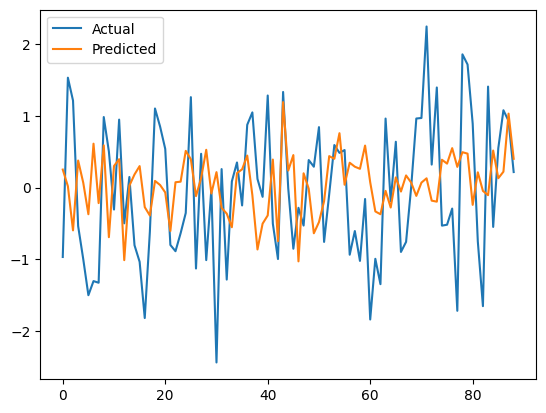

In [ ]:
com.plot()

DTR

In [ ]:
clf = GridSearchCV(DecisionTreeRegressor(), {
    'splitter':['best','random']
}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([0.00519037, 0.00417747]),
 'std_fit_time': array([0.00168381, 0.001165  ]),
 'mean_score_time': array([0.00251451, 0.00164752]),
 'std_score_time': array([0.00074222, 0.0001585 ]),
 'param_splitter': masked_array(data=['best', 'random'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'splitter': 'best'}, {'splitter': 'random'}],
 'split0_test_score': array([-1.74928816, -1.51389685]),
 'split1_test_score': array([-0.34955285, -0.48077097]),
 'split2_test_score': array([-0.87703581, -0.79578904]),
 'split3_test_score': array([-0.53054163, -0.72817724]),
 'split4_test_score': array([-0.69216464, -0.95277948]),
 'mean_test_score': array([-0.83971662, -0.89428272]),
 'std_test_score': array([0.48710048, 0.34514563]),
 'rank_test_score': array([1, 2], dtype=int32)}

In [ ]:

df_dtr = pd.DataFrame(clf.cv_results_)
df_dtr


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005190,0.001684,0.002515,0.000742,best,{'splitter': 'best'},-1.749288,-0.349553,-0.877036,-0.530542,-0.692165,-0.839717,0.487100,1
1,0.004177,0.001165,0.001648,0.000158,random,{'splitter': 'random'},-1.513897,-0.480771,-0.795789,-0.728177,-0.952779,-0.894283,0.345146,2


In [ ]:
df_dtr[['param_splitter','mean_test_score']]

,param_splitter,mean_test_score
0,best,-0.839717
1,random,-0.894283


In [ ]:
clf.best_params_

{'splitter': 'best'}

In [ ]:
clf.best_score_

-0.8397166176574883

In [ ]:
dtr=DecisionTreeRegressor()

In [ ]:
dtr.fit(xtrain, ytrain)


DecisionTreeRegressor()

In [ ]:
pred_dtr = dtr.predict(xtest)

In [ ]:
dtr.score(xtest,ytest)

-0.5371078931059243

In [ ]:
mae = mean_absolute_error(ytest,pred_dtr)
mse = mean_squared_error(ytest,pred_dtr)
rmse = mean_squared_error(ytest,pred_dtr, squared = False)
r2 = r2_score(ytest,pred_dtr)

nse = calculate_nse(ytest, pred_dtr)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)

NSE coefficient: -0.5371078931059243
Mean Absolute Error: 0.9186872789705701
Mean Squared Error: 1.4562795077680013
r2 score: -0.5371078931059243
RMSE: 1.206764064665501


In [ ]:
com = pd.concat([ytest, pd.Series(pred_dtr,index=xtest.index)],axis=1)
com

,spei6,0
397,-0.967445,-1.532801
203,1.530346,1.387778
119,1.211499,-0.279838
331,-0.536570,0.043126
175,-0.998959,0.728164
...,...,...
306,-0.548517,-0.233814
215,0.549538,1.724701
89,1.076869,1.217814
198,0.928958,0.558795


In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Predicted"]
com

,Actual,Predicted
0,-0.967445,-1.532801
1,1.530346,1.387778
2,1.211499,-0.279838
3,-0.536570,0.043126
4,-0.998959,0.728164
...,...,...
84,-0.548517,-0.233814
85,0.549538,1.724701
86,1.076869,1.217814
87,0.928958,0.558795


<Axes: >

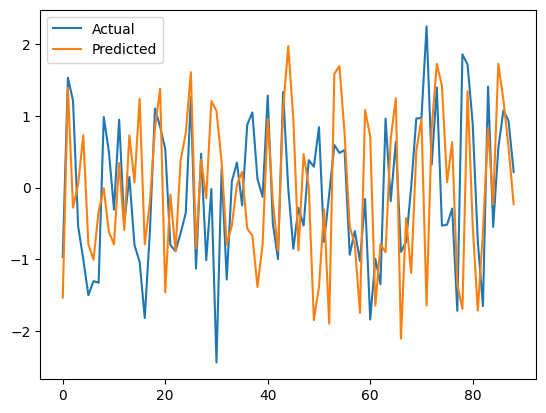

In [ ]:
com.plot()

XGB

In [ ]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
clf = GridSearchCV(XGBRegressor(), {
    'learning_rate': [0.05,0.1,0.5],
    'max_depth': [5,10,15,20,22],
    'n_estimators':[500,1000,2000,4000]
}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([0.60249057, 0.46327472, 0.92746243, 1.02021332, 0.33628039,
        0.64235196, 0.56281242, 0.90442019, 0.5864789 , 0.42778263,
        0.59510298, 0.93850489, 0.60552139, 0.46496019, 0.63430672,
        1.20821052, 0.39061751, 0.4660665 , 0.62059064, 1.21356783,
        0.23699608, 0.34027061, 0.53776913, 1.06832714, 0.20752549,
        0.29580498, 0.4540905 , 1.17582111, 0.21916513, 0.40782442,
        0.47159128, 1.36749735, 0.22679482, 0.30874376, 0.47009196,
        1.06898155, 0.23296838, 0.31765027, 0.47566195, 1.05817471,
        0.11754422, 0.2009758 , 0.35974712, 0.71760521, 0.10669785,
        0.42368574, 0.35852432, 0.70212374, 0.11573234, 0.20044975,
        0.3638804 , 0.95068121, 0.11611114, 0.19213634, 0.35775213,
        0.69838324, 0.35055938, 0.20020242, 0.36340356, 0.69954457]),
 'std_fit_time': array([0.69189052, 0.00999656, 0.46592798, 0.01818477, 0.01123375,
        0.48484142, 0.01148684, 0.00829674, 0.48924979, 0.00929286,
        0.008

In [ ]:
df_xgb = pd.DataFrame(clf.cv_results_)
df_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.602491,0.691891,0.008287,0.007957,0.05,5,500,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-0.813707,0.019437,-0.082116,0.050172,-0.012698,-0.167782,0.325933,13
1,0.463275,0.009997,0.005031,0.000263,0.05,5,1000,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-0.823352,0.019170,-0.083816,0.049803,-0.021452,-0.171929,0.328768,14
2,0.927462,0.465928,0.008620,0.006053,0.05,5,2000,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-0.823166,0.019288,-0.083792,0.049731,-0.021783,-0.171944,0.328670,16
3,1.020213,0.018185,0.007707,0.003315,0.05,5,4000,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-0.823166,0.019288,-0.083792,0.049731,-0.021783,-0.171944,0.328670,15
4,0.336280,0.011234,0.004882,0.000498,0.05,10,500,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",-0.682588,0.064875,-0.213748,0.112941,-0.040123,-0.151729,0.288125,8
5,0.642352,0.484841,0.004925,0.000327,0.05,10,1000,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",-0.682588,0.064875,-0.213748,0.112941,-0.040123,-0.151729,0.288125,5
6,0.562812,0.011487,0.005553,0.000603,0.05,10,2000,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",-0.682588,0.064875,-0.213748,0.112941,-0.040123,-0.151729,0.288125,7
7,0.904420,0.008297,0.006430,0.000384,0.05,10,4000,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",-0.682588,0.064875,-0.213748,0.112941,-0.040123,-0.151729,0.288125,6
8,0.586479,0.489250,0.004828,0.000105,0.05,15,500,"{'learning_rate': 0.05, 'max_depth': 15, 'n_es...",-0.758571,0.017322,-0.166268,0.083615,-0.127917,-0.190364,0.298509,21
9,0.427783,0.009293,0.005392,0.000472,0.05,15,1000,"{'learning_rate': 0.05, 'max_depth': 15, 'n_es...",-0.758571,0.017322,-0.166268,0.083615,-0.127917,-0.190364,0.298509,22


In [ ]:
df_xgb[['param_learning_rate','param_max_depth','param_n_estimators', 'mean_test_score']]

,param_learning_rate,param_max_depth,param_n_estimators,mean_test_score
0,0.05,5,500,-0.167782
1,0.05,5,1000,-0.171929
2,0.05,5,2000,-0.171944
3,0.05,5,4000,-0.171944
4,0.05,10,500,-0.151729
5,0.05,10,1000,-0.151729
6,0.05,10,2000,-0.151729
7,0.05,10,4000,-0.151729
8,0.05,15,500,-0.190364
9,0.05,15,1000,-0.190364


In [ ]:
clf.best_params_


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

In [ ]:
clf.best_score_

-0.1283228262854519

In [ ]:
xgb = XGBRegressor(
    learning_rate = 0.1,
    max_depth = 5,
    n_estimators=500
)

In [ ]:
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
pred_xgb = xgb.predict(xtest)

In [ ]:
xgb.score(xtest,ytest)

-0.03175422930682803

In [ ]:
mae = mean_absolute_error(ytest,pred_xgb)
mse = mean_squared_error(ytest,pred_xgb)
rmse = mean_squared_error(ytest,pred_xgb, squared = False)
r2 = r2_score(ytest,pred_xgb)

nse = calculate_nse(ytest, pred_xgb)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)

NSE coefficient: -0.03175422930682803
Mean Absolute Error: 0.8011455899334478
Mean Squared Error: 0.9774997239500611
r2 score: -0.03175422930682803
RMSE: 0.9886858570597948


In [ ]:
com = pd.concat([ytest, pd.Series(pred_xgb,index=xtest.index)],axis=1)
com

,spei6,0
397,-0.967445,0.435120
203,1.530346,1.071913
119,1.211499,-0.208639
331,-0.536570,-0.297882
175,-0.998959,0.290722
...,...,...
306,-0.548517,-0.250252
215,0.549538,0.050096
89,1.076869,0.765750
198,0.928958,0.524462


In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Pedicted"]
com

,Actual,Pedicted
0,-0.967445,0.435120
1,1.530346,1.071913
2,1.211499,-0.208639
3,-0.536570,-0.297882
4,-0.998959,0.290722
...,...,...
84,-0.548517,-0.250252
85,0.549538,0.050096
86,1.076869,0.765750
87,0.928958,0.524462


<Axes: >

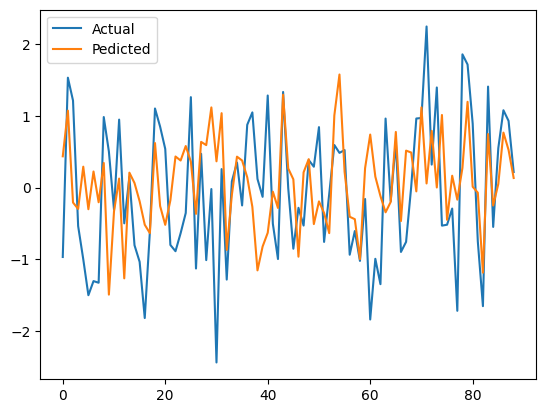

In [ ]:
com.plot()